In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import scipy.integrate
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
def cylinder(x0,y0,r,height):
    z = np.linspace(0, height, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = r*np.cos(theta_grid) + x0
    y_grid = r*np.sin(theta_grid) + y0
    return x_grid,y_grid,z_grid


In [3]:
def potentialSCHW(r, M, L):
    Vsqrd=(1-2*M/r)*(L/r)**2
    return Vsqrd

In [4]:
def potentialKERR(r, M, J, L):
    a=J/M
    beta=r**2-2*M*r+a**2
    Vp=((2*M*r*a+r**2*beta**(0.5))/((r**2+a**2)**2-a**2*beta))*L
    Vn=((2*M*r*a-r**2*beta**(0.5))/((r**2+a**2)**2-a**2*beta))*L
    return Vp, Vn

/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


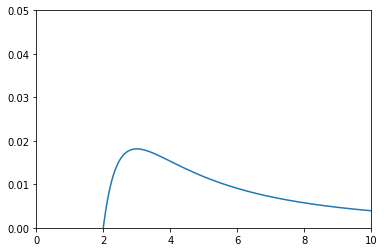

In [5]:
plt.plot(np.arange(0,10,0.001),potentialSCHW(np.arange(0,10,0.001), 1, 0.7))
plt.axis([0,10,0,0.05])
plt.show()

/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


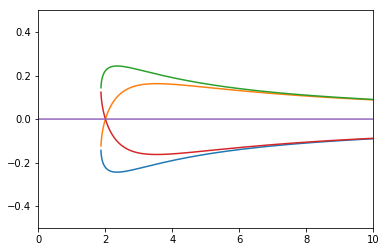

In [6]:
Va=potentialKERR(np.arange(0,10,0.001), 1, 0.5, -1)
Vs=potentialKERR(np.arange(0,10,0.001), 1, 0.5, 1)
plt.plot(np.arange(0,10,0.001),Va[0], np.arange(0,10,0.001), Va[1], np.arange(0,10,0.001),Vs[0], np.arange(0,10,0.001), Vs[1], np.arange(0,10,0.001), np.zeros(int(10/0.001)))
plt.axis([0,10,-0.5,0.5])
plt.show()

In [7]:
#assumes equatorial trajectory, i.e. theta=0
def simSCHW(phiI, b, M, r, dr):
    dphi=1/(r**2*np.sqrt(1/(b**2)-(1-2*M/r)*1/(r**2)))*dr
    phi=np.zeros(len(r))
    for i in range(len(r)):
        phi[i]=phiI+dphi[i]
    return phi


In [8]:
def eqSCHW(phiI, b, M, r, dr):
    dphi=1/(r**2*np.sqrt(1/(b**2)-(1-2*M/r)*1/(r**2)))*dr
    return dphi

/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


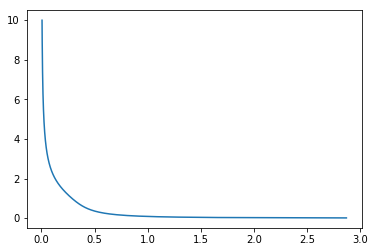

2.22843549758
2.22843549758


In [9]:
plt.plot(eqSCHW(0, 1, 2, np.arange(0,10,0.01), 0.01)*180/math.pi, np.arange(0,10,0.01))
plt.show()
#eqSCHW(0, 1, 1, np.arange(0.01,10,0.01), 0.01)
print(sum(eqSCHW(0, 1, 1, np.arange(0.01,10,0.01), 0.01)))
print(sum(abs(eqSCHW(0, 1, 1, np.arange(0.01,10,0.01), 0.01))))

In [10]:
def SCHWODE(y,r,M,b):
    dphidr=(r**2*(1/(b**2)-1/(r**2)*(1-2*M/r))**(0.5))**(-1)
    return dphidr

In [11]:
def test(y,t):
    dydt=2*t
    return dydt

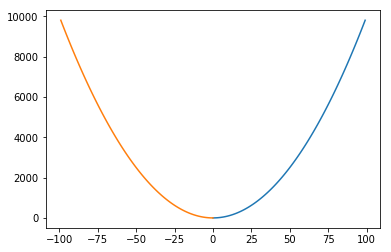

In [12]:
y0=0
t=np.arange(100)
y=scp.integrate.odeint(test, y0, t)
plt.plot(t,y, -t, y)
plt.show()

In [13]:
def SHO(x,t,omega,phi):
    dxdt=-omega*np.sin(omega*t-phi)
    return dxdt

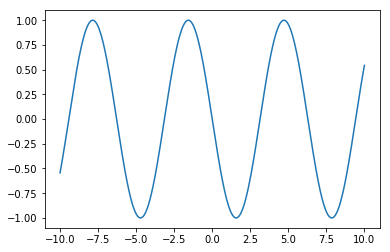

In [14]:
phi=0
x=np.arange(-1,1,0.0001)
t=np.arange(-10,10,0.001)
plt.plot(t,SHO(x,t,1,phi))
plt.show()

/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


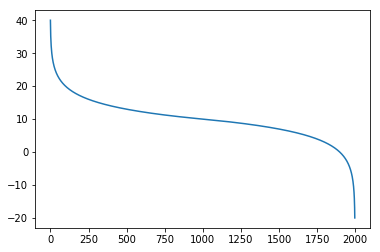

[ 40.00869401  36.99708548  35.23540742 ..., -15.23540742 -16.99708548
 -20.00869401]
[[ 10.        ]
 [ 11.43692521]
 [  9.89449115]
 ..., 
 [  9.78298181]
 [ 10.39542547]
 [ 11.07351965]]


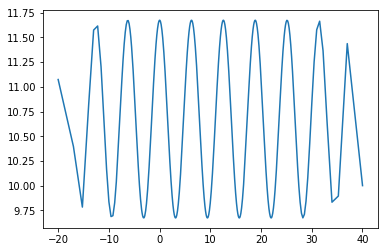

In [15]:
x0=10
t=np.arange(0,10,1)
temp=np.log((np.arange(0,10,0.01)))
lam1=2*10-temp/np.amax(temp)*10
lam2=np.flip(temp,0)/np.amax(temp)*10
lam=np.concatenate((lam1,lam2))
lam=lam[1:len(lam)-1]
plt.plot(lam)
plt.show()
x=scp.integrate.odeint(SHO,x0,lam,(1,0))
print(lam)
print(x)
plt.plot(lam,x)
plt.show()

In [16]:
def SCHWODErphiPOS(rphi,lam,E,M,L):
    r=rphi[0]
    phi=rphi[1]
    drdlam=np.sqrt((E**2)-(1-2*M/r)*L**2/(r**2))
    dphidlam=L/(r**2)
    return (drdlam, dphidlam)

In [17]:
def SCHWODErphiNEG(rphi,lam,E,M,L):
    r=rphi[0]
    phi=rphi[1]
    drdlam=-np.sqrt((E**2)-(1-2*M/r)*L**2/(r**2))
    dphidlam=L/(r**2)
    return (drdlam, dphidlam)

In [18]:
def pathPlotter(M,L,E,R0,phi0=0,dlam=666, lamMax=666):
#    if lamMax==666:
#        lamMax=2*R0*E/L*3
#    if dlam==666:
#        dlam=R0/100
    temp=np.log((np.arange(0,R0)))
    lam1=2*R0-temp/np.amax(temp)*R0
    lam2=np.flip(temp,0)/np.amax(temp)*R0
    lam=np.concatenate((lam1,lam2))
    plt.plot(lam)
    plt.show()
    argsT=(E,M,L)
    rphi0=(R0,phi0)

    rphiPos=scp.integrate.odeint(SCHWODErphiPOS, rphi0, lam, args=argsT)
    print(rphiPos)
    rphi0=(np.amin(rphiPos[np.invert(np.isnan(rphiPos[:,0])),0]), np.amin(rphiPos[np.invert(np.isnan(rphiPos[:,0])),1]))
    rphiNeg=scp.integrate.odeint(SCHWODErphiNEG, rphi0, lam, args=argsT)

    lamNeg=lam[(np.isnan(rphiPos[:,0]))]
    lamPos=lam[np.invert(np.isnan(rphiPos[:,0]))]
    solPos=rphiPos[np.invert(np.isnan(rphiPos[:,0])),:]
    solNeg=rphiNeg[:len(lam[(np.isnan(rphiPos[:,0]))]),:]
    
    plt.plot(lamNeg, solNeg[:,0], lamPos, solPos[:,0])
    plt.show()
    plt.plot(lamNeg, solNeg[:,1], lamPos, solPos[:,1])
    plt.show()

    plt.polar(rphiPos[:,1],rphiPos[:,0], rphiNeg[:,1],rphiNeg[:,0], np.arange(0,math.pi*2,0.01), np.ones(len(np.arange(0,math.pi*2,0.01)))*2*M)
    plt.show()

#     fig = plt.figure()
#     ax = Axes3D(fig)
#     ax.plot(solPos[:,0]*np.cos(solPos[:,1]),solPos[:,0]*np.sin(solPos[:,1]), lamPos)
#     ax.plot(solNeg[:,0]*np.cos(solNeg[:,1]),solNeg[:,0]*np.sin(solNeg[:,1]), lamNeg)
#     Xc,Yc,Zc = cylinder(0,0,2*M,2*R0)
#     ax.plot_surface(Xc, Yc, Zc, alpha=1)
#     plt.show()

    if(np.sum(solPos[:,0]<=(2*M))+np.sum(solNeg[:,0]<=(2*M))>0):
        print("No Recovery")
    else:
        print("Home free")  
    print("Incident Angle: ", solPos[0,1])
    print("Exit Angle: ", solNeg[len(solNeg)-1,1])
    print("defAngle = ", solPos[0,1], " - ", solNeg[len(solNeg)-1,1], " - ", math.pi)
    defAngle=solPos[0,1]-solNeg[len(solNeg)-1,1]-math.pi
    print("Angular deflection is:", defAngle)
    print("In arcseconds :", defAngle*180/math.pi*60*60)

/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


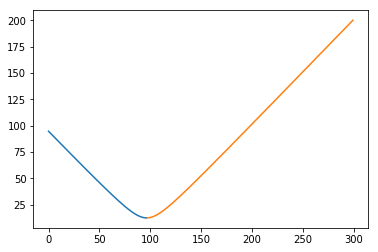

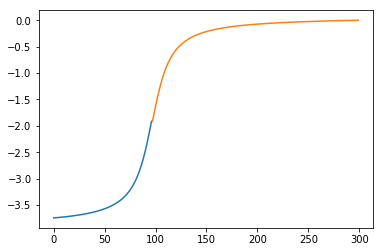

/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/matplotlib/projections/polar.py:58: RuntimeWarning: invalid value encountered in less
  mask = r < 0


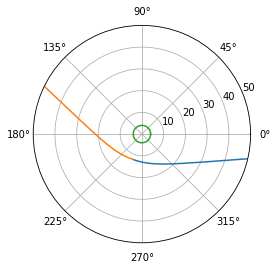

Home free


In [80]:
lam=np.arange(0,300,1)
#print(lam)
#neglam=np.arange(-100,100,0.01)
#lam=neglam
lam=np.flip(lam,0)
M=2
L=15
E=1
argsT=(E,M,L)
rphi0=(200,0)
#print(rphi0)
rphiPos=scp.integrate.odeint(SCHWODErphiPOS, rphi0, lam, args=argsT)
rphi0=(np.amin(rphiPos[np.invert(np.isnan(rphiPos[:,0])),0]), np.amin(rphiPos[np.invert(np.isnan(rphiPos[:,0])),1]))
rphiNeg=scp.integrate.odeint(SCHWODErphiNEG, rphi0, lam, args=argsT)
lamNeg=lam[(np.isnan(rphiPos[:,0]))]
lamPos=lam[np.invert(np.isnan(rphiPos[:,0]))]
solPos=rphiPos[np.invert(np.isnan(rphiPos[:,0])),:]
solNeg=rphiNeg[:len(lam[(np.isnan(rphiPos[:,0]))]),:]
plt.plot(lamNeg, solNeg[:,0], lamPos, solPos[:,0])
plt.show()
plt.plot(lamNeg, solNeg[:,1], lamPos, solPos[:,1])
plt.show()
fig=plt.figure()
ax = plt.subplot(111, projection='polar')
ax.plot(rphiPos[:,1],rphiPos[:,0], rphiNeg[:,1],rphiNeg[:,0], np.arange(0,math.pi*2,0.01), np.ones(len(np.arange(0,math.pi*2,0.01)))*2*M)
ax.axis([0,2*math.pi, 0, 50])
fig.savefig("StrongRegimeTest.png")
plt.show()

# fig = plt.figure()
# ax = Axes3D(fig)
# ax.plot(solPos[:,0]*np.cos(solPos[:,1]),solPos[:,0]*np.sin(solPos[:,1]), lamPos)
# ax.plot(solNeg[:,0]*np.cos(solNeg[:,1]),solNeg[:,0]*np.sin(solNeg[:,1]), lamNeg)
# Xc,Yc,Zc = cylinder(0,0,2,200)
# ax.plot_surface(Xc, Yc, Zc, alpha=1)
# plt.show()

if(np.sum(solPos[:,0]<=(2*M))+np.sum(solNeg[:,0]<=(2*M))>0):
    print("No Recovery")
else:
    print("Home free")

In [ ]:
#pathPlotter(M,L,E,R0,phi0=0,dlam=666, lamMax=666)
pathPlotter(1.47e3,6.96e8,1,1.49e10, lamMax=1e10, dlam=1000)

/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


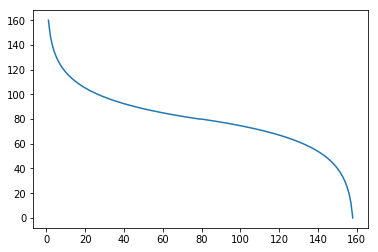

/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


[[  8.00000000e+001   0.00000000e+000]
 [  3.07933532e-007  -1.85407423e+000]
 [  0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000]
 [ -4.85506123e-270   2.75589032e-147]
 [ -6.66857773e+305  -1.97342412e+272]
 [  9.26087496e+011   1.03090794e-118]
 [ -1.80382337e+189   1.12360406e-152]
 [  2.16022638e+101   1.27286542e-086]
 [  1.23097649e-105  -3.19419904e-229]
 [ -4.87352639e+248  -4.20604842e+186]
 [ -7.52238709e-081  -2.22993589e+199]
 [ -4.35911150e-013  -2.77203053e+032]
 [  6.16430061e-066  -7.69178965e-270]
 [ -2.91386484e-258   6.17284357e-141]
 [  2.89578657e-032   1.69055959e+019]
 [ -4.01970482e+018  -6.44637266e+041]
 [ -6.32392522e-220  -7.93845635e+134]
 [  1.49103787e-181  -1.15078324e+212]
 [ -1.18314569e-020   2.2

/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:1918: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:1941: RuntimeWarning: overflow encountered in double_scalars
  best_vmin = (_vmin // step) * step
/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:1727: RuntimeWarning: overflow encountered in double_scalars
  return (d + 1) * self._base


ValueError: Maximum allowed size exceeded

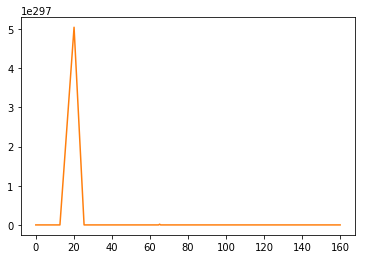

ValueError: Maximum allowed size exceeded

No Recovery
Incident Angle:  0.0


IndexError: index -1 is out of bounds for axis 0 with size 0

In [33]:
#pathPlotter(M,L,E,R0,phi0=0,dlam=666, lamMax=666)
pathPlotter(1,1,2,80, lamMax=80, dlam=0.01)

80


/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


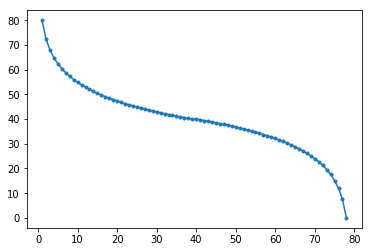

-inf

In [117]:
iLam=2e5
R0=40
temp=np.log((np.arange(0,R0)))
lam1=2*R0-temp/np.amax(temp)*R0
lam2=np.flip(temp,0)/np.amax(temp)*R0
lam=np.concatenate((lam1,lam2))
print(len(lam))
plt.plot(lam, marker='.')
plt.show()
np.amin(lam)

/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


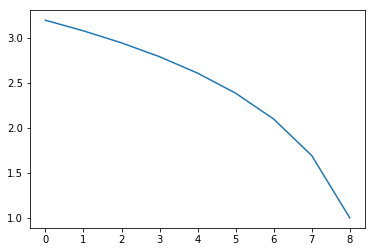

In [24]:
plt.plot(np.log(np.flip(np.arange(10),0))+1)
plt.show()